In [1]:
## Import packages

using Statistics
using LinearAlgebra
using StatsBase
using Random
using JLD
using Plots
using ColorSchemes
using LightGraphs
using PyCall
nx = pyimport("networkx")



┌ Info: Precompiling StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1242
┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1242
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
┌ Info: Precompiling LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1242
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1242


In [2]:
# Practice on one graph
const NNODES = 70
const DATE_STRING = "082520"
const betti_file_name = "RG_50_70_3"
graph_dict = load("/home/jovyan/processed_data/graphs/70nodes/IID_50_70_082520_graphs.jld")
weighted_graph_array = graph_dict["weighted_graph_array"]
maximum(weighted_graph_array)

0.9999901639683317

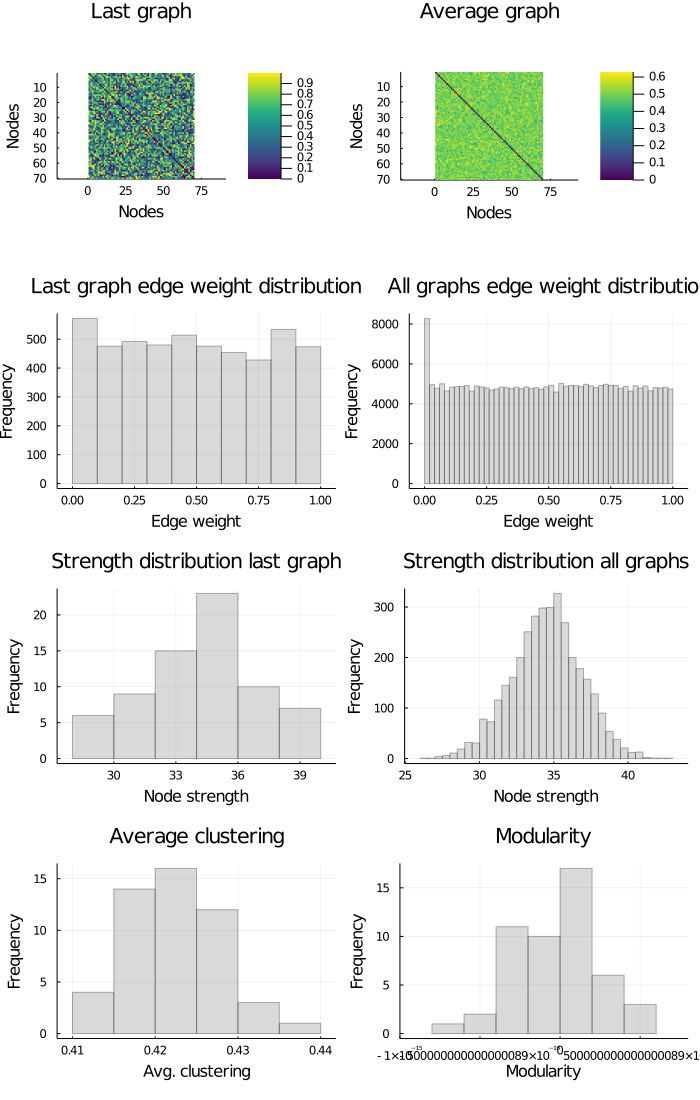

In [21]:
nReps = size(weighted_graph_array)[3]
G_end = weighted_graph_array[:,:,nReps]
G_avg = dropdims(mean(weighted_graph_array, dims=3), dims=3)

p1a = heatmap(G_end,yflip = true, aspect_ratio=:equal, grid = false, c = :viridis)
title!("Last graph")
ylabel!("Nodes")
xlabel!("Nodes")

p1b = heatmap(G_avg,yflip = true, aspect_ratio=:equal, grid=false, c = :viridis)
title!("Average graph")
ylabel!("Nodes")
xlabel!("Nodes")

# Edge weight distributions
p1c = histogram([G_end...], legend = false, c=:gray, alpha = 0.3)
title!("Last graph edge weight distribution")
ylabel!("Frequency")
xlabel!("Edge weight")

p1d = histogram([weighted_graph_array...], legend = false, c=:gray, alpha = 0.3)
title!("All graphs edge weight distribution")
ylabel!("Frequency")
xlabel!("Edge weight")

# Degree distributions
p1e = histogram([sum(G_end, dims=1)...], legend = false, c=:gray, alpha = 0.3)
title!("Strength distribution last graph")
ylabel!("Frequency")
xlabel!("Node strength")

p1f = histogram([sum(weighted_graph_array, dims=1)...], legend = false, c=:gray, alpha = 0.3)
title!("Strength distribution all graphs")
ylabel!("Frequency")
xlabel!("Node strength")

# Graph metrics
clustering = zeros(1,nReps)
modularity = zeros(1,nReps)


for rep in 1:nReps
    
    g = nx.from_numpy_matrix(weighted_graph_array[:,:,rep], parallel_edges=false)
    clustering[1, rep] = nx.average_clustering(g, weight = "weight")
    modularity[1, rep] = nx.algorithms.community.modularity(g, nx.algorithms.community.label_propagation_communities(g))

end
    

p1g = histogram([clustering...], legend=false, c=:gray, alpha = 0.3)
title!("Average clustering (all graphs)")
xlabel!("Avg. clustering")
ylabel!("Frequency")

p1h = histogram([modularity...], legend=false, c=:gray, alpha = 0.3)
title!("Modularity (all graphs)")
xlabel!("Modularity")
ylabel!("Frequency")


plot(p1a, p1b, p1c, p1d, p1e, p1f, p1g, p1h, layout = (4, 2), size = (700,1100))


In [19]:
clustering

1×50 Array{Float64,2}:
 0.41429  0.427621  0.426836  0.428433  …  0.417457  0.421969  0.416671

In [8]:

# nx = pyimport("networkx")
g = nx.from_numpy_matrix(weighted_graph_array[:,:,10], parallel_edges=false)

PyObject <networkx.classes.graph.Graph object at 0x7f7f041c5f98>

In [16]:
nx.algorithms.community.modularity(g, nx.algorithms.community.label_propagation_communities(g))

InterruptException: InterruptException: